# Abalone Project - Data preparation
Maria Eugênia Fonseca\
2021/09/13

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import BoxCoxTransformer

In [2]:
col_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

data = pd.read_csv("../data/raw/abalone_data.txt", header = None, names=col_names)

#### Creating Age variable:

In [3]:
data['age'] = data['rings'] + 1.5
data.drop('rings', axis=1, inplace=True)

#### Removing observations with zero height:

In [4]:
data = data[data['height'] != 0]

#### Separate into train and test before feature eng:

In [5]:
X = data.drop('age', axis=1)
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=data['sex'])

In [6]:
X_train.shape, X_test.shape

((3340, 8), (835, 8))

In [7]:
X_train['sex'].value_counts()

M    1222
I    1072
F    1046
Name: sex, dtype: int64

In [8]:
X_test['sex'].value_counts()

M    306
I    268
F    261
Name: sex, dtype: int64

#### Encoding categorical variable:

In [9]:
X_train

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
2659,F,0.550,0.440,0.135,0.8435,0.4340,0.1995,0.1850
2901,I,0.560,0.430,0.130,0.7280,0.3355,0.1435,0.2175
1250,I,0.400,0.290,0.100,0.2675,0.1205,0.0605,0.0765
1686,M,0.620,0.480,0.150,1.2660,0.6285,0.2575,0.3090
1752,M,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660
...,...,...,...,...,...,...,...,...
113,M,0.425,0.350,0.105,0.3930,0.1300,0.0630,0.1650
3377,I,0.255,0.190,0.070,0.0815,0.0280,0.0160,0.0310
685,M,0.565,0.440,0.185,0.9090,0.3440,0.2325,0.2550
3140,M,0.550,0.425,0.160,0.9700,0.2885,0.1390,0.4800


In [10]:
encoder = OneHotEncoder(variables=['sex'], drop_last=False)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [11]:
X_train

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
2659,0.550,0.440,0.135,0.8435,0.4340,0.1995,0.1850,1,0,0
2901,0.560,0.430,0.130,0.7280,0.3355,0.1435,0.2175,0,1,0
1250,0.400,0.290,0.100,0.2675,0.1205,0.0605,0.0765,0,1,0
1686,0.620,0.480,0.150,1.2660,0.6285,0.2575,0.3090,0,0,1
1752,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660,0,0,1
...,...,...,...,...,...,...,...,...,...,...
113,0.425,0.350,0.105,0.3930,0.1300,0.0630,0.1650,0,0,1
3377,0.255,0.190,0.070,0.0815,0.0280,0.0160,0.0310,0,1,0
685,0.565,0.440,0.185,0.9090,0.3440,0.2325,0.2550,0,0,1
3140,0.550,0.425,0.160,0.9700,0.2885,0.1390,0.4800,0,0,1


#### Scalling que numerical variables:

<AxesSubplot:>

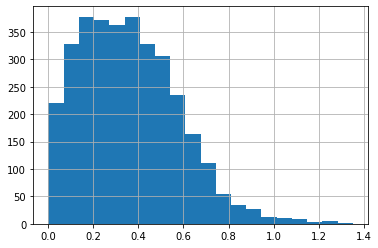

In [12]:
X_train['shucked_weight'].hist(bins=20)

<AxesSubplot:>

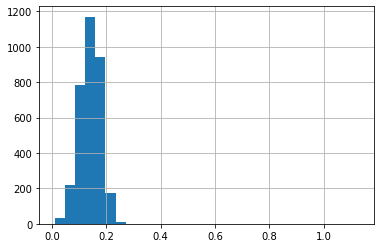

In [13]:
X_train['height'].hist(bins=30)

In [14]:
bc = BoxCoxTransformer(variables=['length', 'diameter', 'height', 'whole_weight',
                                  'shucked_weight', 'viscera_weight', 'shell_weight'])

X_train = bc.fit_transform(X_train)
X_test = bc.transform(X_test)

In [15]:
X_train.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,-0.364931,-0.439005,-1.146911,-0.248782,-0.842267,-1.144661,-1.005460,0.313174,0.320958,0.365868
std,0.062672,0.045033,0.088480,0.548830,0.367720,0.246730,0.261805,0.463854,0.466915,0.481745
min,-0.523734,-0.551302,-1.533558,-1.669926,-1.816218,-1.793852,-1.684457,0.000000,0.000000,0.000000
25%,-0.409620,-0.470870,-1.197659,-0.639856,-1.099845,-1.321401,-1.190538,0.000000,0.000000,0.000000
50%,-0.360624,-0.435888,-1.142181,-0.204857,-0.818799,-1.129717,-0.979766,0.000000,0.000000,0.000000
75%,-0.317643,-0.406823,-1.090426,0.144196,-0.579433,-0.965977,-0.825350,1.000000,1.000000,1.000000
max,-0.169575,-0.299477,0.126915,1.397487,0.326516,-0.254768,0.004995,1.000000,1.000000,1.000000


#### For use in linear models, features need to be scaled.

In [16]:
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# sklearn returns numpy arrays, so we wrap the array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_train.columns
)

In [17]:
X_train.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,0.448395,0.445934,0.232854,0.463304,0.454536,0.421804,0.401904,0.313174,0.320958,0.365868
std,0.176960,0.178827,0.053286,0.178923,0.171613,0.160310,0.154964,0.463854,0.466915,0.481745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.322211,0.319399,0.202291,0.335811,0.334327,0.306969,0.292355,0.000000,0.000000,0.000000
50%,0.460557,0.458311,0.235702,0.477624,0.465489,0.431513,0.417112,0.000000,0.000000,0.000000
75%,0.581917,0.573728,0.266871,0.591418,0.577200,0.537901,0.508512,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

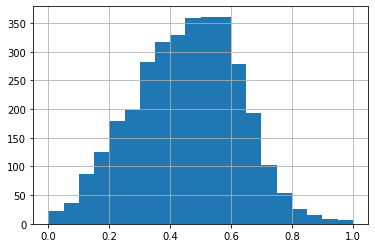

In [18]:
X_train['shucked_weight'].hist(bins=20)

<AxesSubplot:>

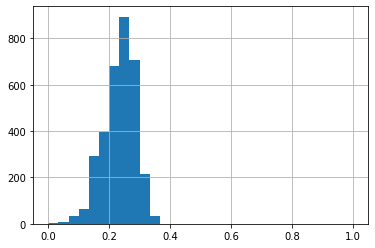

In [19]:
X_train['height'].hist(bins=30)

#### Saving the data:

In [23]:
X_train.to_csv("../data/processed/abalone_xtrain.csv", index=False)
y_train.to_csv("../data/processed/abalone_ytrain.csv", index=False)

X_test.to_csv("../data/processed/abalone_xtest.csv", index=False)
y_test.to_csv("../data/processed/abalone_ytest.csv", index=False)